In [1]:
import pandas as pd

In [2]:
import geopandas as gpd

In [3]:
import datetime

In [4]:
import matplotlib.pyplot as plt

In [47]:
from shapely.geometry import Point, LineString

In [5]:
df = pd.read_csv("data/metro-trips-2021-q3/metro-trips-2021-q3.csv")

x

In [6]:
df.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,165226338,19,7/1/2021 0:12,7/1/2021 0:31,4548,34.026829,-118.393517,4555,34.005871,-118.429161,20122,30,One Way,Monthly Pass,standard
1,165226638,22,7/1/2021 0:23,7/1/2021 0:45,4441,34.026619,-118.281807,4441,34.026619,-118.281807,17346,30,Round Trip,Monthly Pass,electric
2,165226838,26,7/1/2021 0:34,7/1/2021 1:00,4555,34.005871,-118.429161,4555,34.005871,-118.429161,14059,30,Round Trip,Monthly Pass,standard
3,165229638,17,7/1/2021 0:50,7/1/2021 1:07,4441,34.026619,-118.281807,4454,34.017899,-118.291718,17346,30,One Way,Monthly Pass,electric
4,165234338,15,7/1/2021 2:38,7/1/2021 2:53,4564,34.035351,-118.434143,4561,34.020061,-118.422684,15665,30,One Way,Monthly Pass,standard


In [7]:
df.tail()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
58406,172218915,8,9/30/2021 23:28,9/30/2021 23:36,4440,34.061661,-118.298241,4587,34.060791,-118.309067,12362,30,One Way,Monthly Pass,standard
58407,172218913,7,9/30/2021 23:32,9/30/2021 23:39,3056,34.037460,-118.265381,3076,34.040600,-118.253838,20030,365,One Way,Annual Pass,standard
58408,172219114,13,9/30/2021 23:34,9/30/2021 23:47,4217,34.040310,-118.258270,4248,34.028351,-118.288673,19819,30,One Way,Monthly Pass,electric
58409,172219113,7,9/30/2021 23:41,9/30/2021 23:48,3008,34.046612,-118.262733,4315,34.054031,-118.270920,19544,1,One Way,Walk-up,electric
58410,172219313,7,9/30/2021 23:50,9/30/2021 23:57,3030,34.051941,-118.243530,4578,34.042980,-118.252953,19998,1,One Way,Walk-up,standard


In [8]:
len(df)

58411

# Interviewing the data : Here are some questions we can answer from the data

- What is the most common hour to start?
- What is the most common start station?
- How many passholder trips of each type are taken?
- How long is the average time for a trip?
- How long is the average distance for a trip?

# What is the most common hour to start?

In [9]:
df['start_time'] = pd.to_datetime(df['start_time'])

In [10]:
start_time = pd.DataFrame(df['start_time'].dt.round('60min').dt.time.value_counts())
start_time

,start_time
18:00:00,5833
19:00:00,5090
17:00:00,4882
16:00:00,4631
14:00:00,4347
15:00:00,4293
13:00:00,4130
20:00:00,3743
12:00:00,3550
11:00:00,2959


The most commonn hour is 6pm. Here is a graph:

<AxesSubplot:>

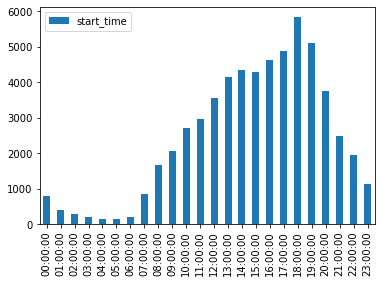

In [11]:
start_time = start_time.sort_index(ascending=True)
start_time.plot(kind = 'bar')

# According to this analysis, metro bikes are most used during 6pm to 7pm and least used from 4am to 5am.

# What is the most common start station?

In [12]:
df['start_station'].value_counts().idxmax()

4214

# Import another CSV, with the station names
# Join them

In [13]:
station_names = pd.read_csv("data/metro-trips-2021-q3/metro-bike-share-stations-2021-10-01.csv")

In [14]:
station_names.head()

,3000,Virtual Station,7/7/2016,N/A,Active
0,3005,7th & Flower,7/7/2016,DTLA,Active
1,3006,Olive & 8th,7/7/2016,DTLA,Active
2,3007,5th & Grand,7/7/2016,DTLA,Active
3,3008,Figueroa & 9th,7/7/2016,DTLA,Active
4,3010,11th & Maple,7/7/2016,DTLA,Active


In [15]:
station_names = station_names.set_index('3000')

In [16]:
station_names.loc[4214]

Virtual Station    Ocean Front Walk & Navy
7/7/2016                          7/7/2017
N/A                               Westside
Active                              Active
Name: 4214, dtype: object

# The most common start station is Ocean Front Walk & Navy on Westside.

# How many passholder trips of each type are taken?

In [17]:
df['passholder_type'].value_counts().idxmax()

'Monthly Pass'

In [18]:
passholder = df.groupby('passholder_type').size()

<AxesSubplot:xlabel='passholder_type'>

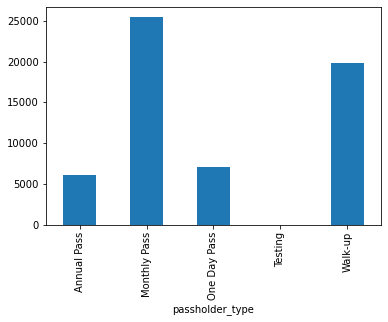

In [19]:
passholder = passholder.sort_index(ascending=True)
passholder.plot(kind = 'bar')

# The most common type of passholder is a monthly pass, while there is a low number of annual passes subscriptions.

# How long is the average time for a trip?

In [20]:
df["duration"].mean()

45.731454691753264

# The average time taken for a Metro bike share trip is around 46 minutes.

In [21]:
duration = df["duration"].value_counts()
duration 

5      2257
6      2191
8      2183
7      2162
9      1918
       ... 
629       1
597       1
533       1
373       1
591       1
Name: duration, Length: 790, dtype: int64

<AxesSubplot:>

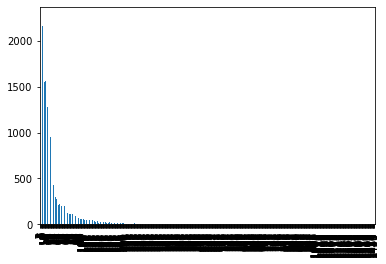

In [22]:
duration = duration.sort_index(ascending=True)
duration.plot(kind = 'bar')

# This looks weird and untidy. So, we can take the first 15 values.

<AxesSubplot:>

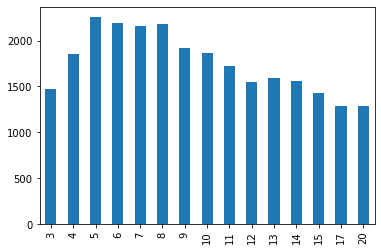

In [23]:
duration = df["duration"].value_counts().head(15)
duration = duration.sort_index(ascending=True)
duration.plot(kind = 'bar')

# Here is a much neater presentation of the average duration of each trip!

In [59]:
gdf_starts = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.start_lon, df.start_lat))
gdf_ends = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.end_lon, df.end_lat))
gdf_starts

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,geometry
0,165226338,19,2021-07-01 00:12:00,7/1/2021 0:31,4548,34.026829,-118.393517,4555,34.005871,-118.429161,20122,30,One Way,Monthly Pass,standard,POINT (-118.42916 34.00587)
1,165226638,22,2021-07-01 00:23:00,7/1/2021 0:45,4441,34.026619,-118.281807,4441,34.026619,-118.281807,17346,30,Round Trip,Monthly Pass,electric,POINT (-118.28181 34.02662)
2,165226838,26,2021-07-01 00:34:00,7/1/2021 1:00,4555,34.005871,-118.429161,4555,34.005871,-118.429161,14059,30,Round Trip,Monthly Pass,standard,POINT (-118.42916 34.00587)
3,165229638,17,2021-07-01 00:50:00,7/1/2021 1:07,4441,34.026619,-118.281807,4454,34.017899,-118.291718,17346,30,One Way,Monthly Pass,electric,POINT (-118.29172 34.01790)
4,165234338,15,2021-07-01 02:38:00,7/1/2021 2:53,4564,34.035351,-118.434143,4561,34.020061,-118.422684,15665,30,One Way,Monthly Pass,standard,POINT (-118.42268 34.02006)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58406,172218915,8,2021-09-30 23:28:00,9/30/2021 23:36,4440,34.061661,-118.298241,4587,34.060791,-118.309067,12362,30,One Way,Monthly Pass,standard,POINT (-118.30907 34.06079)
58407,172218913,7,2021-09-30 23:32:00,9/30/2021 23:39,3056,34.037460,-118.265381,3076,34.040600,-118.253838,20030,365,One Way,Annual Pass,standard,POINT (-118.25384 34.04060)
58408,172219114,13,2021-09-30 23:34:00,9/30/2021 23:47,4217,34.040310,-118.258270,4248,34.028351,-118.288673,19819,30,One Way,Monthly Pass,electric,POINT (-118.28867 34.02835)
58409,172219113,7,2021-09-30 23:41:00,9/30/2021 23:48,3008,34.046612,-118.262733,4315,34.054031,-118.270920,19544,1,One Way,Walk-up,electric,POINT (-118.27092 34.05403)
